<a href="https://colab.research.google.com/github/douglascdsantos/unesp_estatistica_e_probabilidade/blob/main/aula01/tabela%20de%20frequencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# importanto os pacotes necessários
import pandas as pd
import seaborn as sns

# Dicionario de variáveis
- `Id` - identificação do aluno;
- `Turma` - turma do aluno (A ou B);
- `Sexo` - F se feminino, M se masculino;
- `Idade` - idade em anos;
- `Alt` - altura em metros;
- `Peso` - peso em quilogramas;
- `Filhos` - número de filhos na família;
- `Fuma` - tem hábito de fumar (sim ou não);
- `Toler` - tolerância ao cigarro (I para indiferente, P para incomonda pouco e M para incomonda muito).

In [96]:
# importação da planilha disponivel no github
planilha = pd.read_excel('https://github.com/douglascdsantos/unesp_estatistica_e_probabilidade/blob/main/aula01/dados_Aula_01.xlsx?raw=true', index_col='Id')
planilha.head()

,Turma,Sexo,Idade,Alt,Peso,Filhos,Fuma,Toler
Id,,,,,,,,
1,A,F,17,1.60,60.5,2,NAO,P
2,A,F,18,1.69,55.0,1,NAO,M
3,A,M,18,1.85,72.8,2,NAO,P
4,A,M,25,1.85,80.9,2,NAO,P
5,A,F,19,1.58,55.0,1,NAO,M


In [97]:
# resumo estatístico das variáveis númericas
planilha.describe()

,Idade,Alt,Peso,Filhos
count,50.000000,50.000000,50.000000,50.000000
mean,18.900000,1.672000,60.928000,1.700000
std,2.032893,0.090599,12.179089,1.092647
min,17.000000,1.450000,44.000000,1.000000
25%,18.000000,1.602500,52.125000,1.000000
50%,18.000000,1.665000,58.000000,1.000000
75%,19.000000,1.717500,67.875000,2.000000
max,25.000000,1.850000,95.000000,7.000000


# Tabela de Frequência e Frequência relativa de `Toler`

In [99]:
# replicando a tabela de frequência absoluta e relativa vista em aula
tab_freq_e_freq_rel = pd.DataFrame({'freq. absoluta': planilha.Toler.value_counts(),
                                    'freq. relativa': planilha.Toler.value_counts(normalize=True)*100})

tab_freq_e_freq_rel

,freq. absoluta,freq. relativa
P,21,42.0
M,19,38.0
I,10,20.0


In [109]:
# utilizando a função crosstab do pandas
tab_toler = pd.crosstab(index = planilha.Toler,
                       columns = 'count')

tab_toler

col_0,count
Toler,
I,10
M,19
P,21


# Tabela de Frequência de Tolerância por Sexo

In [111]:
tab_toler_sexo = pd.crosstab(index = planilha.Toler,  # variável que será o nosso índice
                       columns = planilha.Sexo,       # variável que terá as entradas únicas como coluna
                       margins = True)                # para visualizarmos a soma das linhas e colunas

tab_toler_sexo

Sexo,F,M,All
Toler,,,
I,7,3,10
M,16,3,19
P,14,7,21
All,37,13,50


# Tabela de Proporções de Tolerância por Sexo

In [113]:
tab_toler_sexo_prop = tab_toler_sexo / tab_toler_sexo.loc['All','All']
tab_toler_sexo_prop

Sexo,F,M,All
Toler,,,
I,0.14,0.06,0.20
M,0.32,0.06,0.38
P,0.28,0.14,0.42
All,0.74,0.26,1.00


# Tabela de Frequência comparandao a Tolerância com sexo e se é fumante


In [45]:
tab_toler_sexo_fuma = pd.crosstab(index = planilha.Toler,         # selecionando index
                       columns = [planilha.Sexo,planilha.Fuma],   # selecionando as colunas de analise, no caso mais de uma variável
                       margins = True)                            # para visualizarmos o total

tab_toler_sexo_fuma

Sexo    F       M     All
Fuma  NAO SIM NAO SIM    
Toler                    
I       3   4   1   2  10
M      16   0   3   0  19
P      14   0   7   0  21
All    33   4  11   2  50

# Tabela de Proporção comparando a Tolerância com sexo e se é fumante


In [108]:
# divide pelo total da coluna
tab_toler_sexo_fuma / tab_toler_sexo_fuma.loc['All']

Sexo          F              M        All
Fuma        NAO  SIM       NAO  SIM      
Toler                                    
I      0.090909  1.0  0.090909  1.0  0.20
M      0.484848  0.0  0.272727  0.0  0.38
P      0.424242  0.0  0.636364  0.0  0.42
All    1.000000  1.0  1.000000  1.0  1.00

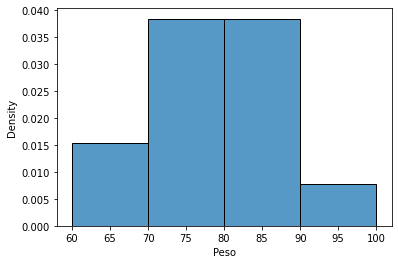

In [117]:
sns.histplot(
    data = planilha.query('Sexo == "M"').Peso,    # selecionando somente os homens
    binwidth=10,                                  # forçando para que o tamanho da nossa classe seja 10, ou seja, cada barrinha vai estar em um intervalo como 50 ⊢ 60
    stat = 'density');                            # selecionando a densidade como medida estatística

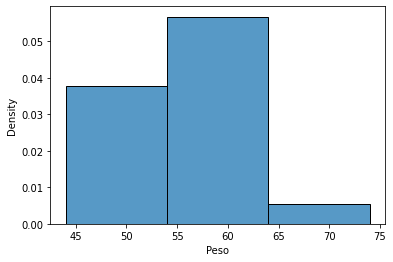

In [116]:
sns.histplot(
    data = planilha.query('Sexo == "F"').Peso,     # selecionando somente as mulheres
    binwidth=10,
    stat = 'density');

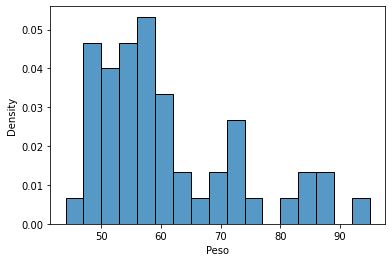

In [93]:
sns.histplot(
    data = planilha,
    x = 'Peso',             # escolha da variável
    binwidth=3,             # selecionando o tamanho da classe como 3, ou seja, cada barrinha vai estar em um intervalo como 50 ⊢ 53
    stat = 'density');

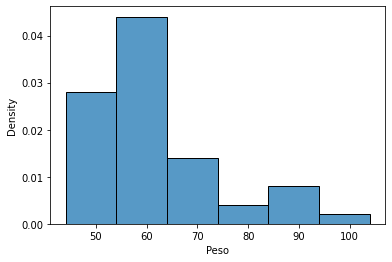

In [120]:
sns.histplot(
    data = planilha,
    x = 'Peso',
    binwidth = 10,
    stat = 'density');

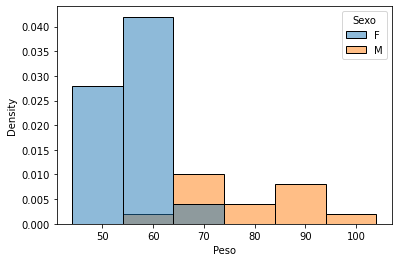

In [124]:
sns.histplot(
    data = planilha,
    x = 'Peso',
    hue = 'Sexo',      # fazendo uma separação entre as entadas únicas da variável Sexo
    binwidth = 10,
    stat = 'density');

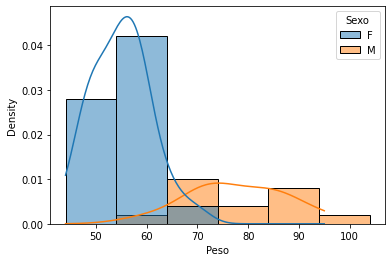

In [125]:
  sns.histplot(
    data = planilha,
    x = 'Peso',
    hue = 'Sexo',
    binwidth=10,
    kde = True,
    stat = 'density');